In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**1. Chargement du dataset**

In [3]:
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"
df = pd.read_csv(url)

**2. Analyse exploratoire**


In [4]:
print(df.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2020-01-01                 11                 10                 12   
1  2020-01-02                 12                  9                 21   
2  2020-01-03                 12                 10                 24   
3  2020-01-04                  9                  5                  7   
4  2020-01-05                  9                  4                 10   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                     10                  11                     10   
1                      9                  11                     10   
2                     11                  12                     10   
3                      5                   8                      7   
4                      4                   7                      7   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                  3.9                    97            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [6]:
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,...,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,...,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,...,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,...,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,...,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,...,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,...,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


**3. Création de slice dataset**

In [9]:
# Sélection des colonnes numériques
X = df.select_dtypes(include='number')
print(X.shape)

(366, 22)


In [11]:
y = df["OPINION"]

(366,)


**4.Utilise un scaler pour mettre à l'échelle tes données**

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(366, 22)


**5.Instancie un objet pca, et entraine-le sur tes données standardisées**

In [14]:
pca = PCA()
pca.fit(X_scaled)

PCA()

**6. Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_. Et 80% ?**

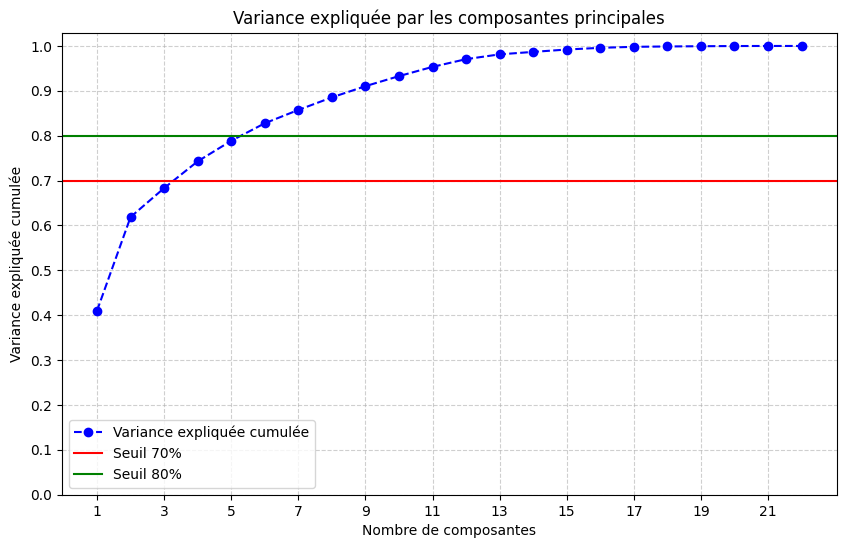

In [22]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b', label='Variance expliquée cumulée')
plt.axhline(y=0.7, color='r', linestyle='-', label='Seuil 70%')
plt.axhline(y=0.8, color='g', linestyle='-', label='Seuil 80%')
plt.xticks(range(1, len(explained_variance) + 1, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée par les composantes principales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**7. Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION.**

In [17]:
X_pca = pca.transform(X_scaled)

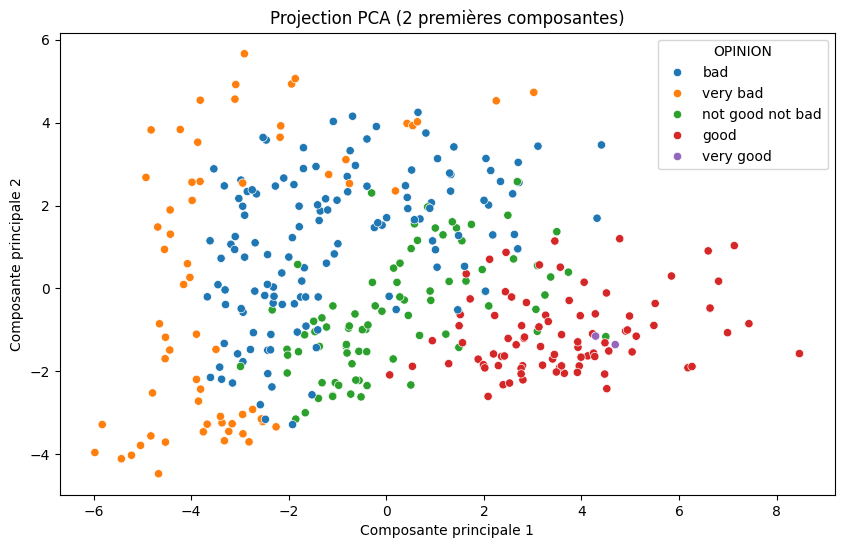

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection PCA (2 premières composantes)")
plt.show()

**8. Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?**

In [20]:
# Classification avec KNN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_scaled = accuracy_score(y_test, y_pred)
print(f"Score du modèle KNN sur X_scaled : {score_scaled:.2f}")

Score du modèle KNN sur X_scaled : 0.78


In [21]:
# Classification avec PCA (2 composantes principales)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca[:, :2], y, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
score_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Score du modèle KNN sur les 2 premières composantes PCA : {score_pca:.2f}")

Score du modèle KNN sur les 2 premières composantes PCA : 0.76
